In [1]:
import pandas as pd

# data = pd.read_csv('dataset/visualizing_global_co2_data.csv')
data = pd.read_csv('dataset/Data_Science_CO2.csv', sep=";")

data.columns

Index(['country', 'year', 'iso_code', 'population', 'gdp', 'cement_co2',
       'cement_co2_per_capita', 'co2', 'co2_growth_abs', 'co2_growth_prct',
       'co2_including_luc', 'co2_including_luc_growth_abs',
       'co2_including_luc_growth_prct', 'co2_including_luc_per_capita',
       'co2_including_luc_per_gdp', 'co2_including_luc_per_unit_energy',
       'co2_per_capita', 'co2_per_gdp', 'co2_per_unit_energy', 'coal_co2',
       'coal_co2_per_capita', 'consumption_co2', 'consumption_co2_per_capita',
       'consumption_co2_per_gdp', 'cumulative_cement_co2', 'cumulative_co2',
       'cumulative_co2_including_luc', 'cumulative_coal_co2',
       'cumulative_flaring_co2', 'cumulative_gas_co2', 'cumulative_luc_co2',
       'cumulative_oil_co2', 'cumulative_other_co2', 'energy_per_capita',
       'energy_per_gdp', 'flaring_co2', 'flaring_co2_per_capita', 'gas_co2',
       'gas_co2_per_capita', 'ghg_excluding_lucf_per_capita', 'ghg_per_capita',
       'land_use_change_co2', 'land_use_chang

In [14]:
Country = 'China'

Country_data = data[data['country'] == Country]

# Select relevant columns: Year, GDP, and CO2
Country_gdp_co2 = Country_data[['country','year', 'gdp', 'co2']].dropna()

Country_gdp_co2.set_index('year', inplace=True)


Country_gdp_co2.head()

,country,gdp,co2
year,,,
1990,China,3.385122e+12,2484855
1991,China,3.508948e+12,2606096
1992,China,3.755037e+12,2730788
1993,China,4.126170e+12,2921651
1994,China,4.438753e+12,3100002


In [15]:
from statsmodels.tsa.stattools import adfuller
from scipy.stats import pearsonr
import matplotlib.pyplot as plt

ADF Statistic for GDP: -0.4484594787813038
p-value: 0.9016879783923154
GDP is non-stationary (p >= 0.05)
--------------------------------------------------
ADF Statistic for CO2: -0.3179227045176624
p-value: 0.9229273044392816
CO2 is non-stationary (p >= 0.05)
--------------------------------------------------


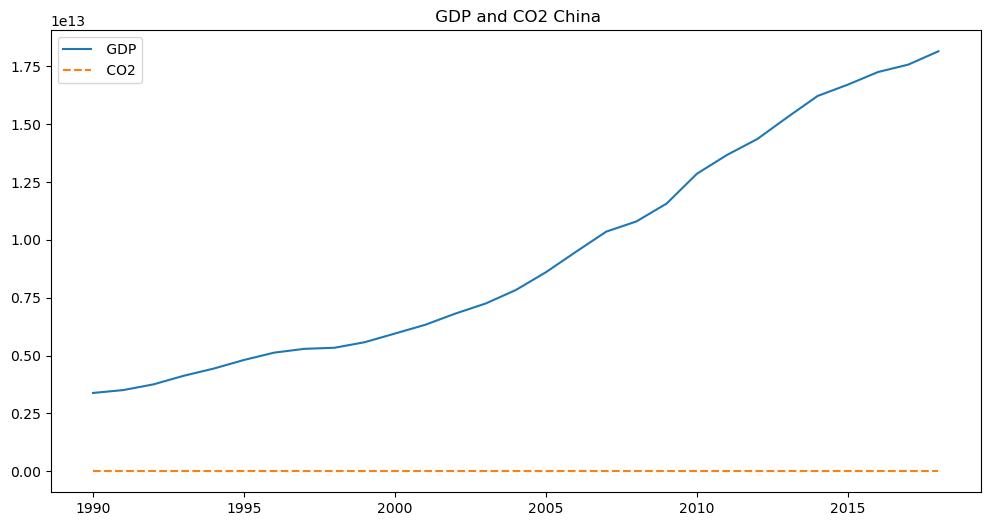

(0.9864922955524444, 9.435306267974944e-23)

In [ ]:
# ADF dingen
def adf_test(series, name):
    result = adfuller(series)
    print(f'ADF Statistic for {name}: {result[0]}')
    print(f'p-value: {result[1]}')
    if result[1] < 0.05:
        print(f"{name} is stationary (p < 0.05)")
    else:
        print(f"{name} is non-stationary (p >= 0.05)")
    print('-'*50)
adf_test(Country_gdp_co2['gdp'], 'GDP')
adf_test(Country_gdp_co2['co2'], 'CO2')

# Diff
# Country_gdp_diff = Country_gdp_co2['gdp'].diff().dropna()
# Country_co2_diff = Country_gdp_co2['co2'].diff().dropna()


Country_gdp_diff = Country_gdp_co2['gdp'].dropna()
Country_co2_diff = Country_gdp_co2['co2'].dropna()

# Plot
# TODO Y SCALING FIX
plt.figure(figsize=(12, 6))
plt.plot(Country_gdp_diff, label=' GDP')
plt.plot(Country_co2_diff, label=' CO2', linestyle='--')
plt.title(' GDP and CO2' + ' ' + Country)
plt.legend()
plt.show()

# Cor Testing
correlation, p_value = pearsonr(Country_gdp_diff, Country_co2_diff)
correlation, p_value


